In [1]:
import ROOT
import os
import pandas
import numpy

Welcome to JupyROOT 6.27/01


In [2]:
timedir = "timeresults"

# filenames = [os.path.join(timedir, filename) for filename in os.listdir(timedir)]
filenames = ["timeresults/read_fromremote_nocache.csv", "timeresults/read_fromremote_withcache.csv"]
#xmins = [0, 0, 0, 0]
#xmaxs = [800, 800, 15, 15]
print(filenames)
        
dfs = []
for filename in filenames:
    df = pandas.read_csv(filename)

    df["mode"] = filename.split("/")[-1].replace(".csv","")
    dfs.append(df)
df = pandas.concat(dfs)
df

['timeresults/read_fromremote_nocache.csv', 'timeresults/read_fromremote_withcache.csv']


,Time,mode
0,418.95,read_fromremote_nocache
1,316.14,read_fromremote_nocache
2,181.88,read_fromremote_nocache
3,139.07,read_fromremote_nocache
4,178.84,read_fromremote_nocache
...,...,...
65,81.65,read_fromremote_withcache
66,82.57,read_fromremote_withcache
67,93.33,read_fromremote_withcache
68,82.52,read_fromremote_withcache


In [3]:
means = df.groupby("mode").mean().reset_index().rename(columns={"Time":"mean"})
stds = df.groupby("mode").std().reset_index().rename(columns={"Time":"std"})
counts = df.groupby("mode").count().reset_index().rename(columns={"Time":"counts"})
values = pandas.concat([means, stds, counts], axis=1)
values["err"] = values["std"] / numpy.sqrt(values["counts"])
values


,mode,mean,mode,std,mode,counts,err
0,read_fromremote_nocache,194.531127,read_fromremote_nocache,128.770936,read_fromremote_nocache,71,15.282298
1,read_fromremote_withcache,170.695714,read_fromremote_withcache,129.505474,read_fromremote_withcache,70,15.478865


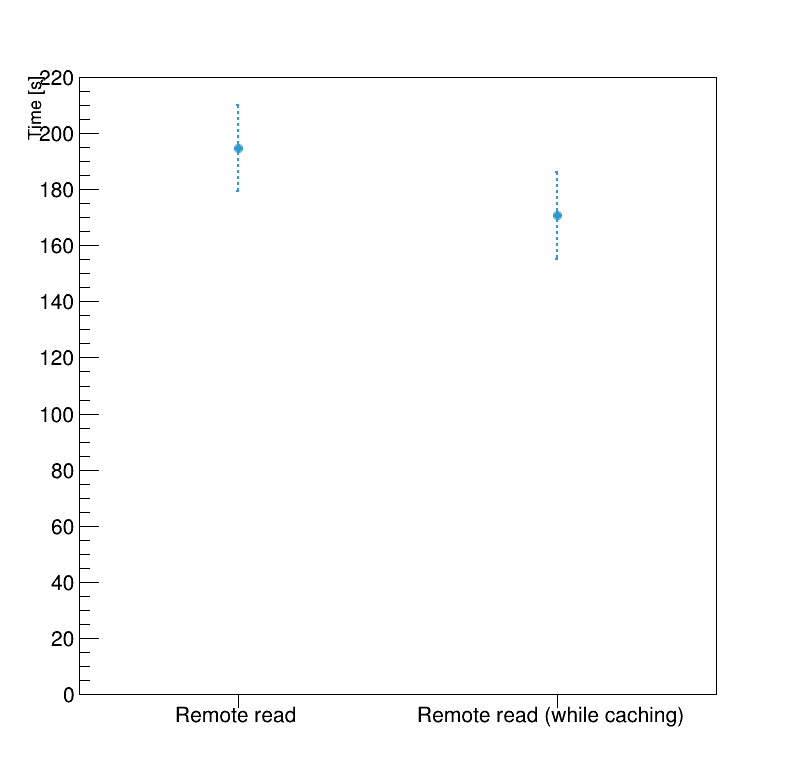

In [4]:
grapherrs = ROOT.TGraphErrors(2, numpy.array([0.5,1.5], dtype=float), numpy.array(values["mean"], dtype=float),
                              0, numpy.array(values["err"], dtype=float))

width = 800
height = 800
c = ROOT.TCanvas("c", "", width, height)

grapherrs.SetTitle("")


grapherrs.GetXaxis().SetLimits(0, 2)
grapherrs.GetXaxis().SetLabelSize(0)
grapherrs.GetXaxis().SetTickLength(0)


grapherrs.GetYaxis().SetTitle("Time [s]")
grapherrs.GetYaxis().SetTitleSize(0.025)
grapherrs.GetYaxis().SetTitleOffset(1.4)
grapherrs.GetYaxis().SetRangeUser(0, 220)
grapherrs.GetYaxis().SetLabelSize(0.03)

grapherrs.SetMarkerColor(ROOT.kAzure+5)
grapherrs.SetMarkerSize(1)
grapherrs.SetMarkerStyle(20)
grapherrs.SetLineStyle(ROOT.kDashed)
grapherrs.SetLineColorAlpha(ROOT.kAzure+5,1)
grapherrs.SetLineWidth(2)
grapherrs.Draw("AP")

ymin = grapherrs.GetHistogram().GetMinimum()
ymax = grapherrs.GetHistogram().GetMaximum()

dy = ymax - ymin
xlabelsvalues = ["Remote read", "Remote read (while caching)"]
xlabels = []
xticks = []

for i in range(2):
    x = grapherrs.GetPointX(i)
    y = grapherrs.GetPointY(i)

    xt = ROOT.TLatex(x, -10, xlabelsvalues[i])
    xt.SetTextSize(0.03)
    xt.SetTextFont(42)
    xt.SetTextAlign(21)
    xt.Draw()
    xlabels.append(xt)

    xl = ROOT.TLine(x, ymin, x,ymin-0.02*dy)
    xl.Draw()
    xticks.append(xl)

c.Update()
c.Draw()

In [5]:
timedir = "timeresults"

# filenames = [os.path.join(timedir, filename) for filename in os.listdir(timedir)]
filenames = ["timeresults/read_fromlocal_nocache.csv", "timeresults/read_fromlocal_withcache.csv"]
#xmins = [0, 0, 0, 0]
#xmaxs = [800, 800, 15, 15]
print(filenames)
        
dfs = []
for filename in filenames:
    df = pandas.read_csv(filename)

    df["mode"] = filename.split("/")[-1].replace(".csv","")
    dfs.append(df)
df = pandas.concat(dfs)
df = df[["AppTime","mode"]]
df

['timeresults/read_fromlocal_nocache.csv', 'timeresults/read_fromlocal_withcache.csv']


,AppTime,mode
0,3.64,read_fromlocal_nocache
1,3.70,read_fromlocal_nocache
2,3.80,read_fromlocal_nocache
3,3.71,read_fromlocal_nocache
4,3.72,read_fromlocal_nocache
...,...,...
45,5.64,read_fromlocal_withcache
46,5.59,read_fromlocal_withcache
47,5.60,read_fromlocal_withcache
48,5.60,read_fromlocal_withcache


In [6]:
means = df.groupby("mode").mean().reset_index().rename(columns={"AppTime":"mean"})
stds = df.groupby("mode").std().reset_index().rename(columns={"AppTime":"std"})
counts = df.groupby("mode").count().reset_index().rename(columns={"AppTime":"counts"})
values = pandas.concat([means, stds, counts], axis=1)
values["err"] = values["std"] / numpy.sqrt(values["counts"])
values["mean_ms"] = values["mean"] * 1000
values["err_ms"] = values["err"] * 1000 
values


,mode,mean,mode,std,mode,counts,err,mean_ms,err_ms
0,read_fromlocal_nocache,3.6946,read_fromlocal_nocache,0.049825,read_fromlocal_nocache,50,0.007046,3694.6,7.046261
1,read_fromlocal_withcache,5.6062,read_fromlocal_withcache,0.041986,read_fromlocal_withcache,50,0.005938,5606.2,5.937704


In [7]:
values_localreads = values[["mode","mean_ms","err_ms"]].iloc[:, 2:].copy().rename(columns={"mean_ms":"mean","err_ms":"err"})
values_localreads

,mode,mean,err
0,read_fromlocal_nocache,3694.6,7.046261
1,read_fromlocal_withcache,5606.2,5.937704


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file means_localreads.png has been created


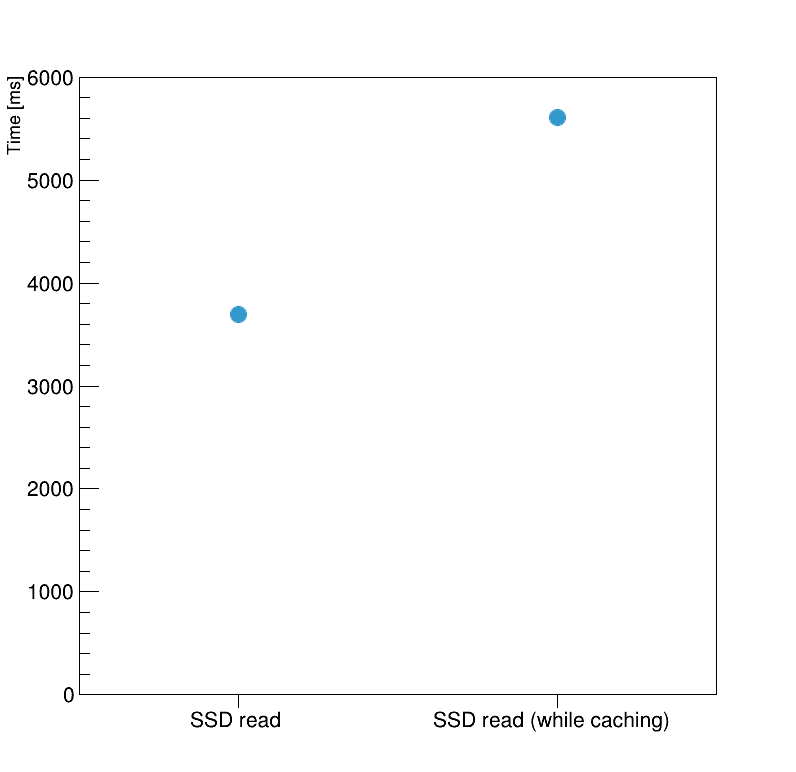

In [8]:
grapherrs = ROOT.TGraphErrors(2, numpy.array([0.5,1.5], dtype=float), numpy.array(values["mean_ms"], dtype=float),
                              0, numpy.array(values["err_ms"], dtype=float))

width = 800
height = 800
c = ROOT.TCanvas("c", "", width, height)

grapherrs.SetTitle("")


grapherrs.GetXaxis().SetLimits(0, 2)
grapherrs.GetXaxis().SetLabelSize(0)
grapherrs.GetXaxis().SetTickLength(0)



grapherrs.GetYaxis().SetTitle("Time [ms]")
grapherrs.GetYaxis().SetTitleSize(0.025)
grapherrs.GetYaxis().SetTitleOffset(2)
grapherrs.GetYaxis().SetRangeUser(0, 6000)
grapherrs.GetYaxis().SetLabelSize(0.03)

grapherrs.SetMarkerColor(ROOT.kAzure+5)
grapherrs.SetMarkerSize(2)
grapherrs.SetMarkerStyle(20)
grapherrs.SetLineStyle(ROOT.kSolid)
grapherrs.SetLineColorAlpha(ROOT.kRed-2,1)
grapherrs.SetLineWidth(0)
grapherrs.Draw("AP")

ymin = grapherrs.GetHistogram().GetMinimum()
ymax = grapherrs.GetHistogram().GetMaximum()

dy = ymax - ymin
xlabelsvalues = ["SSD read", "SSD read (while caching)"]
xlabels = []
xticks = []

for i in range(2):
    x = grapherrs.GetPointX(i)
    y = grapherrs.GetPointY(i)

    xt = ROOT.TLatex(x, -320, xlabelsvalues[i])
    xt.SetTextSize(0.03)
    xt.SetTextFont(42)
    xt.SetTextAlign(21)
    xt.Draw()
    xlabels.append(xt)

    xl = ROOT.TLine(x, ymin, x,ymin-0.02*dy)
    xl.Draw()
    xticks.append(xl)

c.Update()
c.Draw()
c.SaveAs("means_localreads.png")

In [9]:
timedir = "timeresults"

# filenames = [os.path.join(timedir, filename) for filename in os.listdir(timedir)]
filenames = ["timeresults/read_fromlocal_nocache.csv", "timeresults/read_fromdaos_nocache.csv"]
#xmins = [0, 0, 0, 0]
#xmaxs = [800, 800, 15, 15]
print(filenames)
        
dfs = []
for filename in filenames:
    df = pandas.read_csv(filename)

    df["mode"] = filename.split("/")[-1].replace(".csv","")
    dfs.append(df)
df = pandas.concat(dfs)
df = df[["WallTime","mode"]]
df

['timeresults/read_fromlocal_nocache.csv', 'timeresults/read_fromdaos_nocache.csv']


,WallTime,mode
0,3612,read_fromlocal_nocache
1,3670,read_fromlocal_nocache
2,3773,read_fromlocal_nocache
3,3682,read_fromlocal_nocache
4,3689,read_fromlocal_nocache
...,...,...
15,599,read_fromdaos_nocache
16,597,read_fromdaos_nocache
17,586,read_fromdaos_nocache
18,565,read_fromdaos_nocache


In [10]:
means = df.groupby("mode").mean().reset_index().rename(columns={"WallTime":"mean"})
stds = df.groupby("mode").std().reset_index().rename(columns={"WallTime":"std"})
counts = df.groupby("mode").count().reset_index().rename(columns={"WallTime":"counts"})
values = pandas.concat([means, stds, counts], axis=1)
values["err"] = values["std"] / numpy.sqrt(values["counts"])
values = values.sort_values(by="mean",ascending=False)
values


,mode,mean,mode,std,mode,counts,err
1,read_fromlocal_nocache,3665.72,read_fromlocal_nocache,49.791828,read_fromlocal_nocache,50,7.041628
0,read_fromdaos_nocache,599.50,read_fromdaos_nocache,31.267101,read_fromdaos_nocache,20,6.991536


In [11]:
values_localvsdaos = values[["mode","mean","err"]].iloc[1:, 2:].copy()
values_localvsdaos

,mode,mean,err
0,read_fromdaos_nocache,599.5,6.991536


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file means_localvsdaos.png has been created


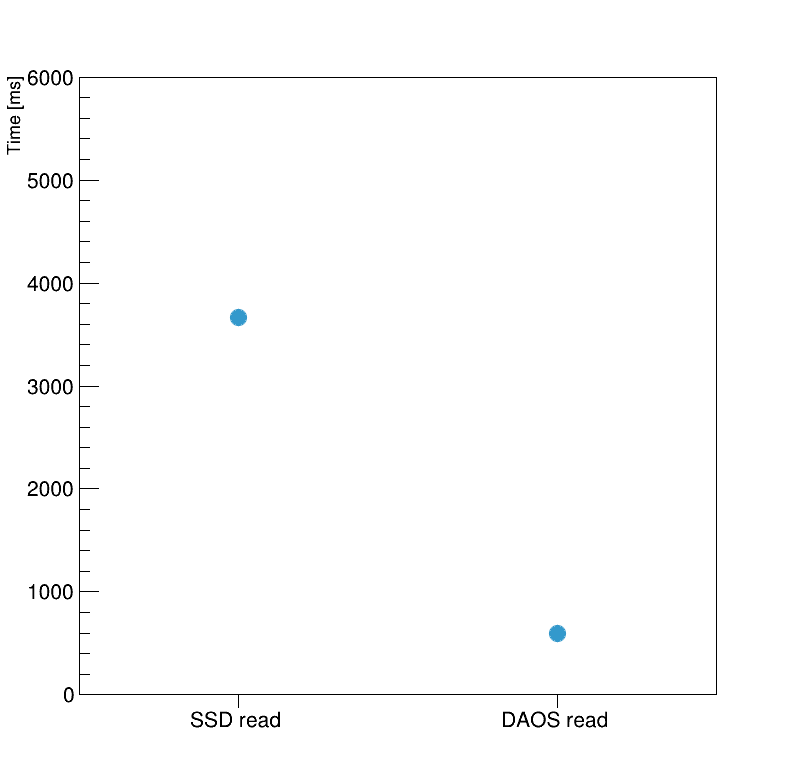

In [12]:
grapherrs = ROOT.TGraphErrors(2, numpy.array([0.5,1.5], dtype=float), numpy.array(values["mean"], dtype=float),
                              0, numpy.array(values["err"], dtype=float))

width = 800
height = 800
c = ROOT.TCanvas("c", "", width, height)

grapherrs.SetTitle("")


grapherrs.GetXaxis().SetLimits(0, 2)
grapherrs.GetXaxis().SetLabelSize(0)
grapherrs.GetXaxis().SetTickLength(0)



grapherrs.GetYaxis().SetTitle("Time [ms]")
grapherrs.GetYaxis().SetTitleSize(0.025)
grapherrs.GetYaxis().SetTitleOffset(2)
grapherrs.GetYaxis().SetRangeUser(0, 6000)
grapherrs.GetYaxis().SetLabelSize(0.03)


grapherrs.SetMarkerColor(ROOT.kAzure+5)
grapherrs.SetMarkerSize(2)
grapherrs.SetMarkerStyle(20)
grapherrs.SetLineStyle(ROOT.kSolid)
grapherrs.SetLineColorAlpha(ROOT.kRed-2,1)
grapherrs.SetLineWidth(2)
grapherrs.Draw("AP")

ymin = grapherrs.GetHistogram().GetMinimum()
ymax = grapherrs.GetHistogram().GetMaximum()

dy = ymax - ymin
xlabelsvalues = ["SSD read", "DAOS read"]
xlabels = []
xticks = []

for i in range(2):
    x = grapherrs.GetPointX(i)
    y = grapherrs.GetPointY(i)

    xt = ROOT.TLatex(x, -320, xlabelsvalues[i])
    xt.SetTextSize(0.03)
    xt.SetTextFont(42)
    xt.SetTextAlign(21)
    xt.Draw()
    xlabels.append(xt)

    xl = ROOT.TLine(x, ymin, x,ymin-0.02*dy)
    xl.Draw()
    xticks.append(xl)

c.Draw()
c.SaveAs("means_localvsdaos.png")

In [13]:
values_combined = pandas.concat([values_localreads, values_localvsdaos])
values_combined

,mode,mean,err
0,read_fromlocal_nocache,3694.6,7.046261
1,read_fromlocal_withcache,5606.2,5.937704
0,read_fromdaos_nocache,599.5,6.991536


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file means_localvscachevsdaos.png has been created


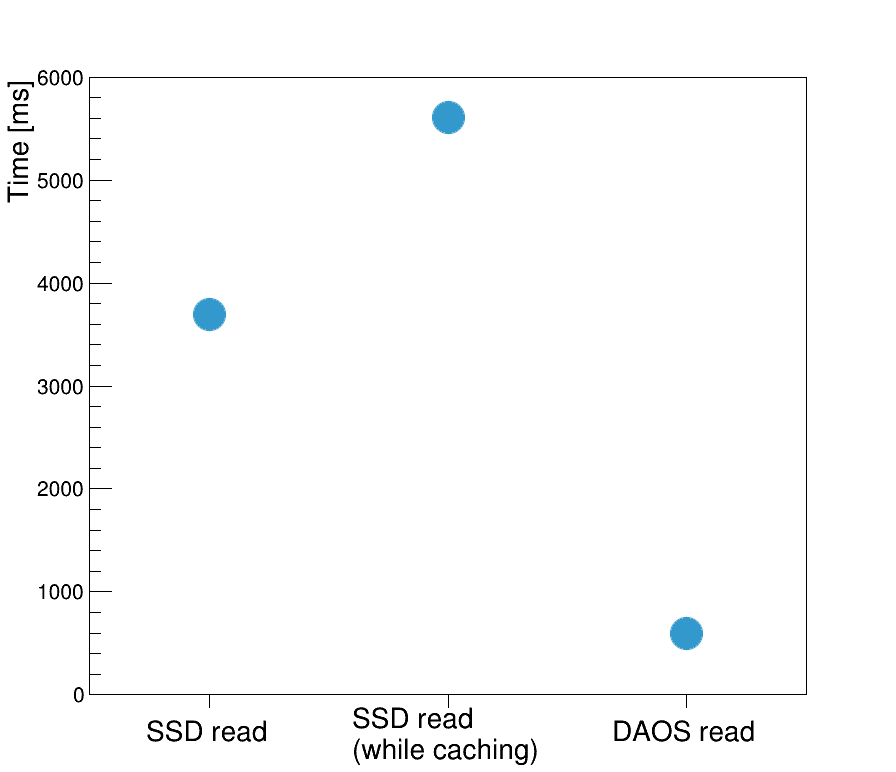

In [38]:
grapherrs = ROOT.TGraphErrors(3, numpy.array([0.5,1.5,2.5], dtype=float), numpy.array(values_combined["mean"], dtype=float),
                              0, numpy.array(values_combined["err"], dtype=float))

width = 900
height = 800
c = ROOT.TCanvas("c", "", width, height)

grapherrs.SetTitle("")


grapherrs.GetXaxis().SetLimits(0, 3)
grapherrs.GetXaxis().SetLabelSize(0)
grapherrs.GetXaxis().SetTickLength(0)



grapherrs.GetYaxis().SetTitle("Time [ms]")
grapherrs.GetYaxis().SetTitleSize(0.04)
grapherrs.GetYaxis().SetTitleOffset(1.2)
grapherrs.GetYaxis().SetRangeUser(0, 6000)
grapherrs.GetYaxis().SetLabelSize(0.03)


grapherrs.SetMarkerColor(ROOT.kAzure+5)
grapherrs.SetMarkerSize(4)
grapherrs.SetMarkerStyle(20)
grapherrs.SetLineStyle(ROOT.kSolid)
grapherrs.SetLineColorAlpha(ROOT.kRed-2,1)
grapherrs.SetLineWidth(2)
grapherrs.Draw("AP")

ymin = grapherrs.GetHistogram().GetMinimum()
ymax = grapherrs.GetHistogram().GetMaximum()

dy = ymax - ymin
xlabelsvalues = ["SSD read", "#splitline{SSD read}{(while caching)}","DAOS read"]
xlabels = []
xticks = []

for i in range(3):
    x = grapherrs.GetPointX(i)
    y = grapherrs.GetPointY(i)

    xt = ROOT.TLatex(x, -450, xlabelsvalues[i])
    xt.SetTextSize(0.04)
    xt.SetTextFont(42)
    xt.SetTextAlign(21)
    xt.Draw()
    xlabels.append(xt)

    xl = ROOT.TLine(x, ymin, x,ymin-0.02*dy)
    xl.Draw()
    xticks.append(xl)

c.Draw()
c.SaveAs("means_localvscachevsdaos.png")